- **Handwritting numbers detection** --Neural network back-propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio
import scipy.optimize as opt
from sklearn import datasets
from sklearn.metrics import classification_report

# Load dataset

In [2]:
digits = datasets.load_digits()

In [3]:
type(digits)

sklearn.utils.Bunch

In [4]:
print('digits.keys() = ', digits.keys())

digits.keys() =  dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


- Digits is a handwritting number dataset, it is a bunch type dataset, which inherits from the dictionary class.
- Digits contains data, target, target_names, images and DESCR

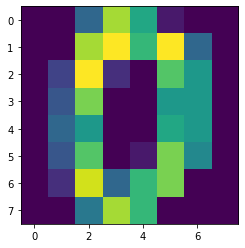

In [5]:
#plt.gray()
plt.imshow(digits.images[0])

In [6]:
print('digits.data.shape = ', digits.data.shape)
print('digits.target.shape = ', digits.target.shape)
print('digits.target = ', digits.target)
print('digits.target_names.shape = ', digits.target_names.shape)
print('digits.target_names = ', digits.target_names)
print('digits.images.shape = ', digits.images.shape)
#print('digits.images = ', digits.images)

digits.data.shape =  (1797, 64)
digits.target.shape =  (1797,)
digits.target =  [0 1 2 ... 8 9 8]
digits.target_names.shape =  (10,)
digits.target_names =  [0 1 2 3 4 5 6 7 8 9]
digits.images.shape =  (1797, 8, 8)


In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

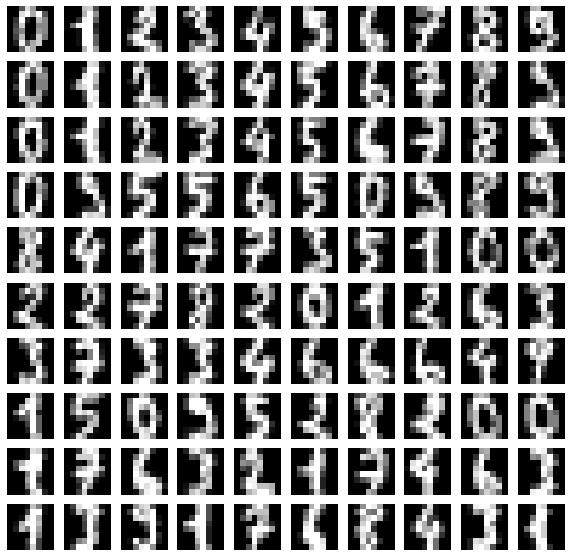

In [8]:
#check the first one hundred images
_, axes = plt.subplots(10,10,figsize = (10,10))
axes = [item for subl in axes for item in subl]

for i, ax in enumerate(axes):
    img = digits.images[i]
    ax.imshow(img, cmap="gray")
    ax.axis('off')

In [9]:
from sklearn import preprocessing
# encoded=to_categorical(digits.target_names)#digits.target

In [10]:
def one_hot(original_labels):
    # recode the labels as vectors
    label = preprocessing.LabelEncoder()
    one_hot = preprocessing.OneHotEncoder(sparse = False)
    original_labels = original_labels.reshape(-1,1)
    label_vector = one_hot.fit_transform(original_labels)
    
    return label_vector

In [11]:
label_vectors = one_hot(digits.target)

E:\Anaconda3\install\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [12]:
label_vectors[0, :]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
digits.target[0], label_vectors[0]

(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

<img style="float: left;" src="NN.png">

Thus, our neural network has an input layer that matches the size of our instance data, which have more than 64 bias units (with one extra bias unit), a hidden layer with 25 cells (26 bias units), and a output layer with 10 cells.

# Forward-propagation and cost function

## Sigmoid function

In [14]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

## Forward propagation

In [14]:
a = np.array([[1,2], [3,4],[4,5]])
B = np.array([[1,2,3], [4,5,6]])
# (a @ a.T) == (np.dot(a, a.T))
# a @ a.T
np.multiply(a, a)

array([[ 1,  4],
       [ 9, 16],
       [16, 25]])

In [31]:
def serialize(a, b):
  
    return np.concatenate((np.ravel(a), np.ravel(b)))

In [15]:
def deserialize(seq, theta_dimensions):
#     """into ndarray of (25, 401), (10, 26)"""
    return seq[:theta_dimensions[0]*theta_dimensions[1]].reshape(theta_dimensions[0], theta_dimensions[1]), seq[theta_dimensions[0]*theta_dimensions[1]:].reshape(theta_dimensions[2], theta_dimensions[-1])

In [16]:
def forward_propagation(theta, X):
    
    theta1, theta2 = deserialize(theta,theta_dimensions)
    m = X.shape[0]
    a1 = X
    
    z2 = a1 @ theta1.T
    a2 = np.insert(sigmoid(z2), 0, np.ones(m), axis=1)
    
    z3 = a2 @ theta2.T
    h = sigmoid(z3)
    
    return a1, z2, a2, z3, h

In [17]:
theta_dimensions = [25, 65, 10, 26]

In [85]:
INIT_EPSILON = 0.0001

Theta1 = np.random.rand(25,65) * (2 * INIT_EPSILON) - INIT_EPSILON
Theta2 = np.random.rand(10,26) * (2 * INIT_EPSILON) - INIT_EPSILON

In [86]:
theta = serialize(Theta1, Theta2)

In [87]:
theta

array([-9.42216286e-05,  6.78710127e-05,  7.62774287e-05, ...,
       -9.09881357e-05,  2.77648686e-05,  4.48301896e-05])

np.random.seed(2)

size = theta_dimensions[0]*theta_dimensions[1] + theta_dimensions[2]*theta_dimensions[-1]

theta = (np.random.uniform(-0.12, 0.12, size)-0.5)*10**(-1)

theta = (theta - theta.min()) / (theta.max() - theta.min())

theta.max(), theta.min()

In [88]:
X = np.insert(digits.data, 0, np.ones(digits.data.shape[0]), axis=1)
y = label_vectors

In [89]:
X.shape

(1797, 65)

In [90]:
a,b,c,d, h = forward_propagation(theta, X)

In [91]:
a.shape, b.shape, c.shape, d.shape

((1797, 65), (1797, 25), (1797, 26), (1797, 10))

## cost function 
### without regularization term

$$J(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}\big [-y_k^{(i)}log((h_{\theta}(x^{(i)}))_k)-(1-y_k^{(i)})log(1-(h_{\theta}(x^{(i)}))_k)\big ]$$

In [92]:
def cost_fun(theta, X, y):
    """
    y:(m, k) ndarray
    """
    m = X.shape[0] #get the data size
    
    _, _, _, _, h = forward_propagation(theta, X)
    
    # np.multiply is pairwise operation
    pair_computation = -np.multiply(y, np.log(h)) - np.multiply((1-y), np.log(1-h))
    
    return pair_computation.sum() / m

In [93]:
cost_fun(theta, X, y)

6.931424027392726

### with regularization term

$$\begin{aligned}
J(\theta)=&\frac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}\Big [-y_k^{(i)}log((h_{\theta}(x^{(i)}))_k)-(1-y_k^{(i)})log(1-(h_{\theta}(x^{(i)}))_k)\Big ]\\&+\frac{\lambda}{2m}\Big [\sum\limits_{j=1}^{25}\sum\limits_{k=1}^{64}(\Theta_{j,k}^{(1)})^2+\sum\limits_{j=1}^{10}\sum\limits_{k=1}^{25}(\Theta_{j,k}^{(2)})^2\Big ]\end{aligned}$$

In [119]:
def regularized_cost_fun(theta, X, y, l=0.5):
    theta1, theta2 = deserialize(theta, theta_dimensions)
    m = X.shape[0]
    
    reg_theta1 = (1.0 / (2.0 * m)) * np.power(theta1[:, 1:], 2).sum()
    reg_theta2 = (1.0 / (2.0 * m)) * np.power(theta2[:, 1:], 2).sum()
    
    return cost_fun(theta, X, y) + reg_theta1 + reg_theta2

In [95]:
regularized_cost_fun(theta, X, y)

6.931424029075628

# Back-propagation

In [96]:
def sigmoid_gradient(z):
    """
    pairwise op is key for this to work on both vector and matrix
    """
    return np.multiply(sigmoid(z), 1 - sigmoid(z))

## Theta gradient

In [97]:
def theta_gradient(theta, X, y):
    #initialize
    theta1, theta2 = deserialize(theta, theta_dimensions)
    m = X.shape[0]
    
    delta1 = np.zeros(theta1.shape)
    delta2 = np.zeros(theta2.shape)
    
    a1, z2, a2, z3, h = forward_propagation(theta, X)
    
    for i in range(m):
        a1i = a1[i, :]  # (1, 65)
        z2i = z2[i, :]  # (1, 25)
        a2i = a2[i, :]  # (1, 26)

        hi = h[i, :]    # (1, 10)
        yi = y[i, :]    # (1, 10)

        d3i = hi - yi  # (1, 10)

        z2i = np.insert(z2i, 0, np.ones(1))  # make it (1, 26) to compute d2i
        d2i = np.multiply(theta2.T @ d3i, sigmoid_gradient(z2i))  # (1, 26)

        # careful with np vector transpose
        delta2 += np.matrix(d3i).T @ np.matrix(a2i)  # (1, 10).T @ (1, 26) -> (10, 26)
        delta1 += np.matrix(d2i[1:]).T @ np.matrix(a1i)  # (1, 25).T @ (1, 401) -> (25, 65)

    delta1 = delta1 / m
    delta2 = delta2 / m

    return serialize(delta1, delta2)

In [98]:
d1, d2 = deserialize(theta_gradient(theta, X, y),theta_dimensions)

In [99]:
d1.shape, d2.shape

((25, 65), (10, 26))

## Gradient calibration

$$f_i(\theta) \approx \frac{J(\theta^{(i+)})-J(\theta^{(i-)})}{2\epsilon}$$

In [100]:
def expand_array(arr):
    """replicate array into matrix
    [1, 2, 3]

    [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]]
    """
    # turn matrix back to ndarray
    return np.array(np.matrix(np.ones(arr.shape[0])).T @ np.matrix(arr))

def gradient_checking(theta, X, y, epsilon, regularized=False):
    def a_numeric_grad(plus, minus, regularized=False):
        """calculate a partial gradient with respect to 1 theta"""
        if regularized:
            return (regularized_cost_fun(plus, X, y) - regularized_cost_fun(minus, X, y)) / (epsilon * 2)
        else:
            return (cost_fun(plus, X, y) - cost_fun(minus, X, y)) / (epsilon * 2)

    theta_matrix = expand_array(theta)  # expand to (10285, 10285)
#     print(theta_matrix.shape)
    epsilon_matrix = np.identity(len(theta)) * epsilon

    plus_matrix = theta_matrix + epsilon_matrix
    minus_matrix = theta_matrix - epsilon_matrix

    # calculate numerical gradient with respect to all theta
    numeric_grad = np.array([a_numeric_grad(plus_matrix[i], minus_matrix[i], regularized)
                                    for i in range(len(theta))])

    # analytical grad will depend on if you want it to be regularized or not
    analytic_grad = regularized_gradient(theta, X, y) if regularized else theta_gradient(theta, X, y)

    # If you have a correct implementation, and assuming you used EPSILON = 0.0001
    # the diff below should be less than 1e-9
    # this is how original matlab code do gradient checking
    diff = np.linalg.norm(numeric_grad - analytic_grad) / np.linalg.norm(numeric_grad + analytic_grad)

    print('If your backpropagation implementation is correct,\nthe relative difference will be smaller than 10e-9 (assume epsilon=0.0001).\nRelative Difference: {}\n'.format(diff))


In [120]:
def regularized_gradient(theta, X, y, l=0.5):
    """don't regularize theta of bias terms"""
    m = X.shape[0]
    delta1, delta2 = deserialize(theta_gradient(theta, X, y), theta_dimensions)
    t1, t2 = deserialize(theta, theta_dimensions)

    t1[:, 0] = 0
    reg_term_d1 = (l / m) * t1
    delta1 = delta1 + reg_term_d1

    t2[:, 0] = 0
    reg_term_d2 = (l / m) * t2
    delta2 = delta2 + reg_term_d2

    return serialize(delta1, delta2)

In [121]:
gradient_checking(theta, X, y, epsilon= 0.0001, regularized=True)#这个运行很慢，谨慎运行

KeyboardInterrupt: 

## define back propagation function

In [103]:
y[0,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
def backpropagation(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # reshape the parameter array into parameter matrices for each layer
#     theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size)], (hidden_size, (input_size))))
#     theta2 = np.matrix(np.reshape(params[hidden_size * (input_size):], (num_labels, (hidden_size))))
    theta1, theta2 = deserialize(theta, theta_dimensions)
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagation(theta, X)
    
    # initializations
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    
    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    # perform backpropagation
    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)
        
        d3t = ht - yt  # (1, 10)
        
        z2t = np.insert(z2t, 0, values=np.ones(1))  # (1, 26)
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t))  # (1, 26)
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    # add the gradient regularization term
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, grad

In [110]:
theta_dimensions

[25, 65, 10, 26]

In [122]:
J, grad = backpropagation(theta, theta_dimensions[1], theta_dimensions[0], theta_dimensions[2], X, y, learning_rate=0.5)
J, grad.shape

(6.931352678344596, (1885,))

# Ready to train the model

In [124]:
from scipy.optimize import minimize

# minimize the objective function
fmin = minimize(fun=backpropagation, x0=theta, args=(65, 25, 10, X, y, 1), 
                method='TNC', jac=True, options={'maxiter': 500})
fmin

     fun: 6.931352679186047
     jac: array([3.64862996e-05, 3.77690666e-08, 9.96376030e-06, ...,
       2.00212040e-01, 2.00479717e-01, 1.99899196e-01])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 55
     nit: 1
  status: 1
 success: True
       x: array([-1.39509311e-17,  6.78710127e-05,  7.62774287e-05, ...,
       -9.09881357e-05,  2.77648686e-05,  4.48301896e-05])

In [125]:
X = np.matrix(X)
theta1 = np.matrix(np.reshape(fmin.x[:25 * 65], (25, 65)))
theta2 = np.matrix(np.reshape(fmin.x[25 * (65):], (10, 26)))

a1, z2, a2, z3, h = forward_propagation(theta, X)
y_pred = np.array(np.argmax(h, axis=1))
y_pred

array([[7],
       [7],
       [7],
       ...,
       [7],
       [7],
       [7]], dtype=int64)

In [126]:
(y_pred-7).sum()

0

In [127]:
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, digits.target)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 9.961046188091263%


In [128]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

# Show the hidden layer

In [77]:
def plot_hidden_layer(theta):
    """
    theta: (size, )
    """
    final_theta1, _ = deserialize(theta, theta_dimensions)
    hidden_layer = final_theta1[:, 1:]  # ger rid of bias term theta

    fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(5, 5))

    for r in range(5):
        for c in range(5):
            ax_array[r, c].matshow(hidden_layer[5 * r + c].reshape((8, 8)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


# nn functions starts here ---------------------------
# ps. all the y here is expanded version (5000,10)

In [117]:
final_theta = fmin.x

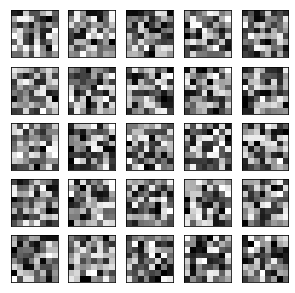

In [118]:
plot_hidden_layer(final_theta)
plt.show()